# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
print (url)
citytwo = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_t = []
wind_s= []
countries = []

countone= 1
setone = 1

for city in cities:
    try:
        query_url = url + "&q=" + city.replace(" ","+")
        print(query_url) 
        response = requests.get(query_url).json()
        print(response)
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_t.append(response['main']['temp_max'])
        wind_s.append(response['wind']['speed'])
        if countone > 48:
            countone = 1
            setone += 1
            citytwo.append(city)
        else:
            countone += 1
            citytwo.append(city)
        print(f"processing record {countone} of set {setone}) | {city}")
    except Exception:
        print("City not found. Skipping...")




http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=lamballe
{'coord': {'lon': -2.51, 'lat': 48.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.16, 'feels_like': 39.33, 'temp_min': 44.01, 'temp_max': 46.4, 'pressure': 1036, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1580869590, 'sys': {'type': 1, 'id': 6557, 'country': 'FR', 'sunrise': 1580888069, 'sunset': 1580922810}, 'timezone': 3600, 'id': 3008225, 'name': 'Lamballe', 'cod': 200}
processing record 2 of set 1) | lamballe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=cape+town
{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken

{'coord': {'lon': -50.01, 'lat': -24.79}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 63.25, 'feels_like': 63.1, 'temp_min': 63.25, 'temp_max': 63.25, 'pressure': 1017, 'humidity': 94, 'sea_level': 1017, 'grnd_level': 907}, 'wind': {'speed': 7.07, 'deg': 89}, 'clouds': {'all': 49}, 'dt': 1580869663, 'sys': {'country': 'BR', 'sunrise': 1580806735, 'sunset': 1580854133}, 'timezone': -10800, 'id': 3466704, 'name': 'Castro', 'cod': 200}
processing record 14 of set 1) | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=chokurdakh
{'coord': {'lon': 147.92, 'lat': 70.63}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': -16.22, 'feels_like': -25.67, 'temp_min': -16.22, 'temp_max': -16.22, 'pressure': 1029, 'humidity': 98, 'sea_level': 1029, 'grnd_level': 1027}, 'wind': {'spe

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=doha
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=avarua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=touros
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=hermiston
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=hermanus
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=hilo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=port+elizabeth
City not found. Skipping.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=senanga
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=tilichiki
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=tuktoyaktuk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=new+norfolk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=attawapiskat
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=rocha
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=rawannawi
City not found. Skipping...
http://api.o

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=kitsuki
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=balabac
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=maragogi
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=khatanga
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=maarianhamina
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=saskylakh
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=carnarvon
City not found.

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=fort+saint+john
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=mujiayingzi
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=mehamn
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=thinadhoo
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=ponta+do+sol
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=aksu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=camacha
City not fou

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=qasigiannguit
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=pringsewu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=xuanhua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=hovd
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=chunskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=chelmza
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=lander
City not found. Skipping...
http://api.openweather

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=kyra
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=fuyu
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=provideniya
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=petropavlovsk-kamchatskiy
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=amahai
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=necochea
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=dekar
City not foun

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=kruisfontein
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=shigony
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=henties+bay
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=karaul
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=meteti
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=cao+bang
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=cobija
City not found. Skip

City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=bowen
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=zhaotong
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=lolua
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=fergus+falls
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=megion
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=kharovsk
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=cojocna
City not found. Skipping.

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=ikom
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=ambon
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=askiz
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=mikumi
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=tam+ky
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=port+alberni
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d2a94afbf012f55d0dc1ab5da36adb79&q=kumluca
City not found. Skipping...
http://api.openweathermap.org/d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weatherdict = {
    "city": citytwo,
    "cloudiness": cloudinesses,
    "country": countries,
    "date": dates,
    "humidity": humidities,
    "lat": lats,
    "lng": lngs,
    "max temp":max_t,
    "wind speed": wind_s
}

In [15]:
weather_df = pd.DataFrame(weatherdict)
weather_df.head()

,city,cloudiness,country,date,humidity,lat,lng,max temp,wind speed
0,lamballe,90,FR,1580869590,87,48.47,-2.51,46.40,6.93
1,cape town,75,ZA,1580869591,88,-33.93,18.42,70.00,6.93
2,vaini,40,TO,1580869598,79,-21.20,-175.20,84.20,6.93
3,kavaratti,61,IN,1580869599,77,10.57,72.64,80.33,15.84
4,airai,33,TL,1580869599,47,-8.93,125.41,84.18,3.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

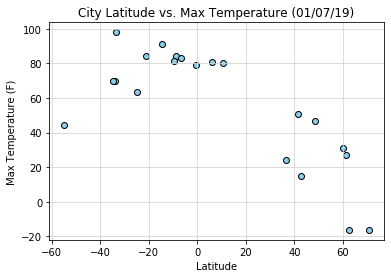

In [17]:
plt.scatter(weather_df["lat"],weather_df["max temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Humidity Plot

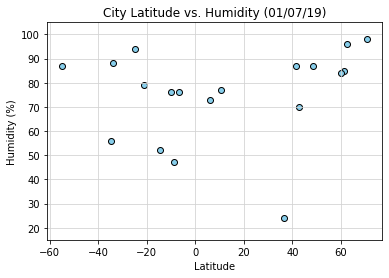

In [18]:
plt.scatter(weather_df["lat"],weather_df["humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Cloudiness Plot

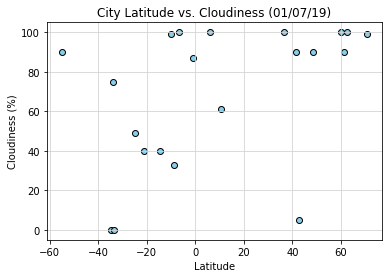

In [20]:
plt.scatter(weather_df["lat"],weather_df["cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Wind Speed Plot

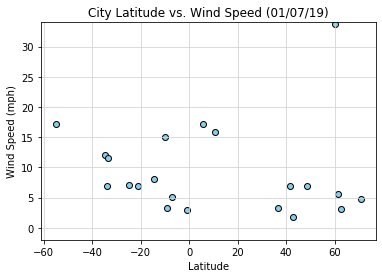

In [23]:

plt.scatter(weather_df["lat"],weather_df["wind speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()